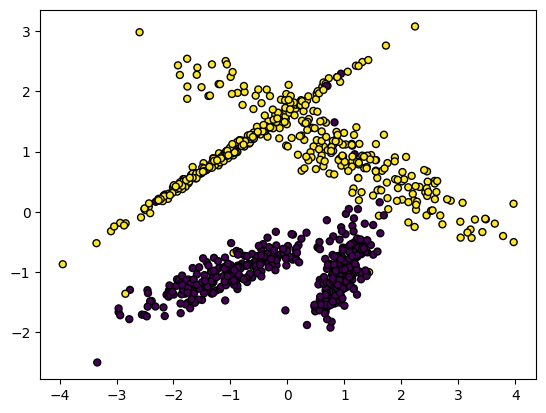

In [114]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data1, data1_y = make_classification(n_samples=923, n_classes=2, n_features=2, n_redundant=0,
                                      n_clusters_per_class=2,  random_state=110)
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

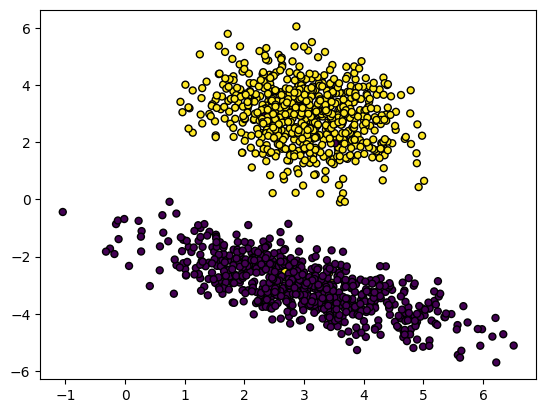

In [115]:
data2, data2_y = make_classification(n_samples=1400, n_classes=2, n_features=2, n_informative=2, 
                           n_redundant=0, class_sep = 3,random_state=0,
                           flip_y=0.01, n_clusters_per_class=1)
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

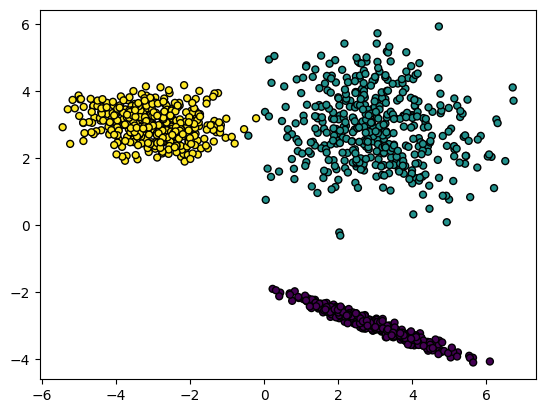

In [116]:
data3, data3_y = make_classification(n_samples=1300, n_classes=3, n_features=2, n_informative=2, 
                           n_redundant=0, class_sep = 3,random_state=0,
                           flip_y=0, n_clusters_per_class=1)
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

## Kmeans

датасет 1

In [117]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
#
#param_grid = {
#    "n_init": range(5,30),
#    'algorithm': ["lloyd",'elkan'],
#    "n_clusters": range(2,10)
#}

#gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
#gridseach.fit(data1)
#gridseach.best_params_
#{'algorithm': 'lloyd', 'n_clusters': 9, 'n_init': 10}

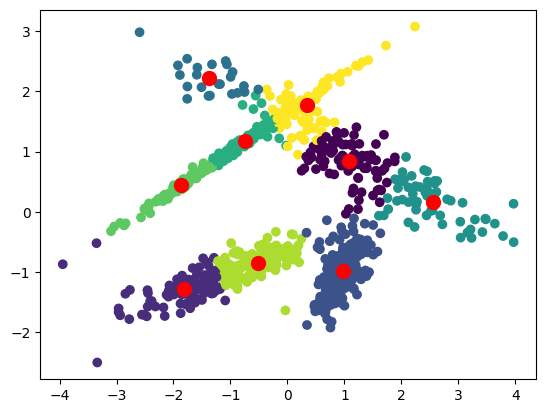

In [118]:

kmeans1 = KMeans(9, n_init=10,algorithm= 'lloyd').fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import jaccard_score

print("ранд:", rand_score(kmeans1.labels_, data1_y))
print("индекс жаккара:", jaccard_score(kmeans1.labels_, data1_y, average = None),'\n')
print("силуэт:", silhouette_score(data1, kmeans1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, kmeans1.labels_))


ранд: 0.636075421324879
индекс жаккара: [0.00900901 0.005386   0.         0.         0.         0.
 0.         0.         0.        ] 

силуэт: 0.512065600964124
индекс дэвида- болдуина: 0.6509519778333707


датасет 2

In [120]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

#param_grid = {
#    "n_init": range(5,30),
#    'algorithm': ["lloyd",'elkan'],
#    "n_clusters": range(2,6)
#}
#
#gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
#gridseach.fit(data2)
#gridseach.best_params_
#>>>> {'algorithm': 'lloyd', 'n_clusters': 5, 'n_init': 19}

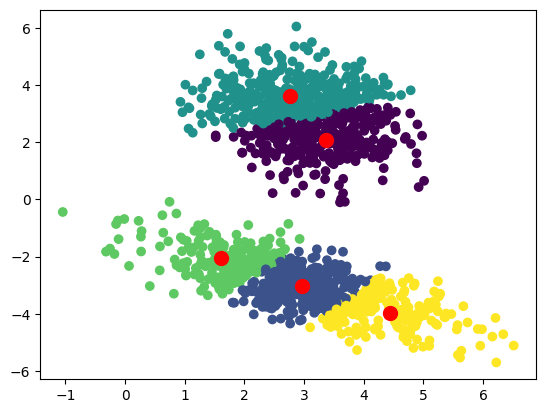

In [121]:
kmeans2 = KMeans(5, n_init=19,algorithm= 'lloyd').fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [122]:
print("ранд:", rand_score(kmeans2.labels_, data2_y))
print("индекс жаккара:", jaccard_score(kmeans2.labels_, data2_y, average =None),'\n')
print("силуэт:", silhouette_score(data2, kmeans2.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, kmeans2.labels_))

ранд: 0.713593383028694
индекс жаккара: [0.000998   0.00292683 0.         0.         0.        ] 

силуэт: 0.3776212104593616
индекс дэвида- болдуина: 0.9161822209707529


 датасет 3

In [123]:
#param_grid = {
#    "n_init": range(5,30),
#    'algorithm': ["lloyd",'elkan'],
#    "n_clusters": range(2,6)
#}
#
#gridseach = GridSearchCV(KMeans(3), param_grid=param_grid)
#gridseach.fit(data3)
#gridseach.best_params_

#>>>> {'algorithm': 'lloyd', 'n_clusters': 5, 'n_init': 5}

ранд: 0.887743234440694
индекс жаккара: [0.49308756 0.00115607 0.         0.         0.        ] 

силуэт: 0.5406823637533791
индекс дэвида- болдуина: 0.7730795452590604


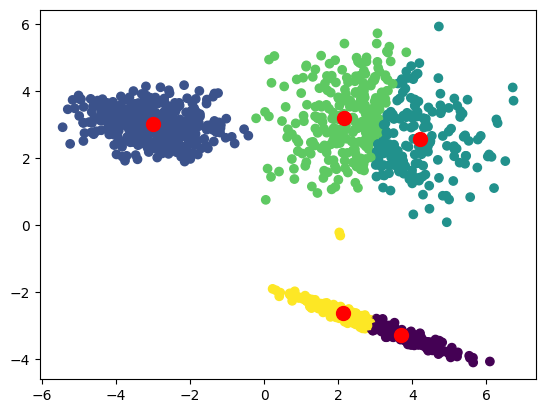

In [124]:
kmeans3 = KMeans(5, n_init=5,algorithm= 'lloyd').fit(data3)


plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')


print("ранд:", rand_score(kmeans3.labels_, data3_y))
print("индекс жаккара:", jaccard_score(kmeans3.labels_, data3_y, average= None),'\n')
print("силуэт:", silhouette_score(data3, kmeans3.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, kmeans3.labels_))

## AffinityPropagation


In [125]:
from sklearn.cluster import AffinityPropagation


датасет 1

ранд: 0.5654719238172233
индекс жаккара: [0.0019305  0.03703704 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ] 

силуэт: 0.41773393343096643
индекс дэвида- болдуина: 0.6905140276007389


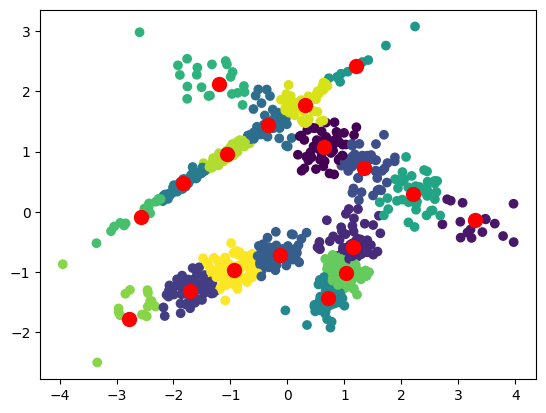

In [126]:
AP1 = AffinityPropagation(max_iter= 200,preference=- 10, damping=0.7).fit(data1)


plt.scatter(data1[:,0], data1[:,1], c=AP1.labels_)
plt.scatter(AP1.cluster_centers_[:,0], AP1.cluster_centers_[:,1], s=100, c='red')


print("ранд:", rand_score(AP1.labels_, data1_y))
print("индекс жаккара:", jaccard_score(AP1.labels_, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, AP1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, AP1.labels_))

датасет 2

ранд: 0.5417951598080262
индекс жаккара: [0.         0.08987161 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ] 

силуэт: 0.3118669270052171
индекс дэвида- болдуина: 0.9044105985323498


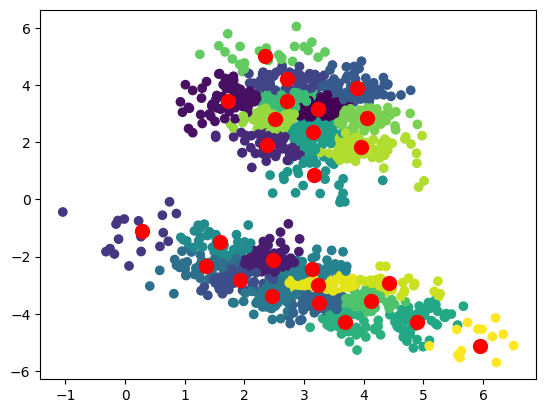

In [127]:
AP2 = AffinityPropagation(max_iter= 200,preference=- 10, damping=0.7).fit(data2)


plt.scatter(data2[:,0], data2[:,1], c=AP2.labels_)
plt.scatter(AP2.cluster_centers_[:,0], AP2.cluster_centers_[:,1], s=100, c='red')


print("ранд:", rand_score(AP2.labels_, data2_y))
print("индекс жаккара:", jaccard_score(AP2.labels_, data2_y, average= None),'\n')
print("силуэт:", silhouette_score(data2, AP2.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, AP2.labels_))

датасет 3

ранд: 0.7129780304376148
индекс жаккара: [0.         0.05311778 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ] 

силуэт: 0.37738670347811876
индекс дэвида- болдуина: 0.7933493831267799


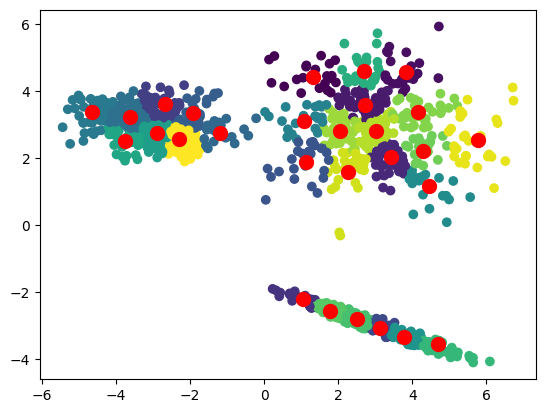

In [128]:
AP3 = AffinityPropagation(max_iter= 200,preference=- 10, damping=0.7).fit(data3)


plt.scatter(data3[:,0], data3[:,1], c=AP3.labels_)
plt.scatter(AP3.cluster_centers_[:,0], AP3.cluster_centers_[:,1], s=100, c='red')


print("ранд:", rand_score(AP3.labels_, data3_y))
print("индекс жаккара:", jaccard_score(AP3.labels_, data3_y, average= None),'\n')
print("силуэт:", silhouette_score(data3, AP3.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, AP3.labels_))

## DB-SCAN

In [129]:
from sklearn.cluster import DBSCAN
import numpy as np


датасет 1

In [130]:
best_i=0
max_rand=0
for i in range(1,30):
    dbscan = DBSCAN(eps=0.4, min_samples=i).fit(data1)
    if silhouette_score(data1, dbscan.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(data1, dbscan.labels_)
print(best_i)

5


[-1  0]
ранд: 0.4995287929814831
индекс жаккара: [0.         0.50326797 0.        ] 

силуэт: 0.4336725070196222
индекс дэвида- болдуина: 50.88041839919314


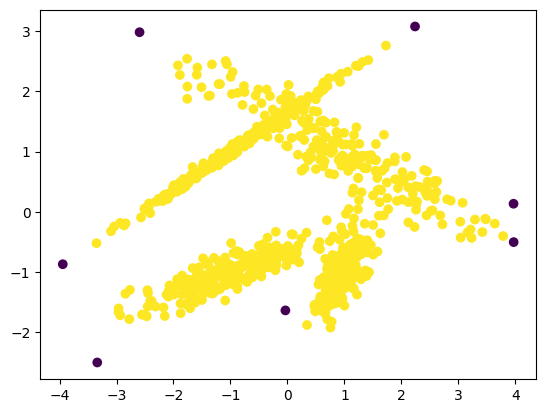

In [131]:

dbscan1 = DBSCAN(eps=0.40, min_samples=5).fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

print("ранд:", rand_score(dbscan1.labels_, data1_y))
print("индекс жаккара:", jaccard_score(dbscan1.labels_, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, dbscan1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, dbscan1.labels_))


датасет 2

In [132]:
best_i=0
max_rand=0
for i in range(1,30):
    dbscan = DBSCAN(eps=0.4, min_samples=i).fit(data2)
    if silhouette_score(data2, dbscan.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(data2, dbscan.labels_)
print(best_i)

3


[-1  0  1]
ранд: 0.9802195445726539
индекс жаккара: [0.         0.97578348 0.98435277] 

силуэт: 0.633621020564921
индекс дэвида- болдуина: 1.8278201380093142


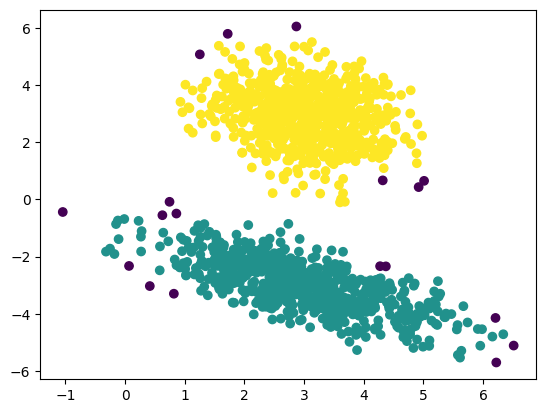

In [133]:

dbscan2 = DBSCAN(eps=0.40, min_samples=3).fit(data2)

print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

print("ранд:", rand_score(dbscan2.labels_, data2_y))
print("индекс жаккара:", jaccard_score(dbscan2.labels_, data2_y, average= None),'\n')
print("силуэт:", silhouette_score(data2, dbscan2.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, dbscan2.labels_))

датасет 3

In [134]:
best_i=0
max_rand=0
for i in range(1,30):
    dbscan = DBSCAN(eps=0.4, min_samples=i).fit(data3)
    if silhouette_score(data3, dbscan.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(data3, dbscan.labels_)
print(best_i)

5


[-1  0  1  2]
ранд: 0.9795724521821519
индекс жаккара: [0. 0. 0. 0.] 

силуэт: 0.6612659268153236
индекс дэвида- болдуина: 3.8819458360325916


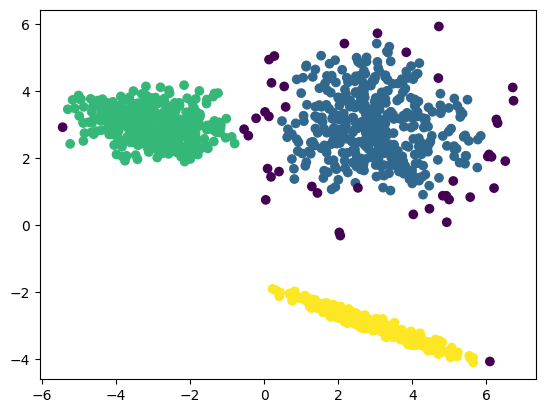

In [135]:

dbscan3 = DBSCAN(eps=0.40, min_samples=5).fit(data3)

print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

print("ранд:", rand_score(dbscan3.labels_, data3_y))
print("индекс жаккара:", jaccard_score(dbscan3.labels_, data3_y, average= None),'\n')
print("силуэт:", silhouette_score(data3, dbscan3.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, dbscan3.labels_))

# Gaussian Mixtures

In [136]:
from sklearn.mixture import GaussianMixture

#param_grid = {
#    "n_init": range(5,30),
#    'covariance_type': ["full",'tied', 'diag', 'spherical'],
#    'n_components': range(2,5)
#}
#
#gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
#gridseach.fit(data1)
#gridseach.best_params_


# >>>> {'covariance_type': 'full', 'n_components': 4, 'n_init': 18}

ранд: 0.737172240853766
индекс жаккара: [0.00569801 0.46753247 0.         0.        ] 

силуэт: 0.38729224140440904
индекс дэвида- болдуина: 0.9323877767095845


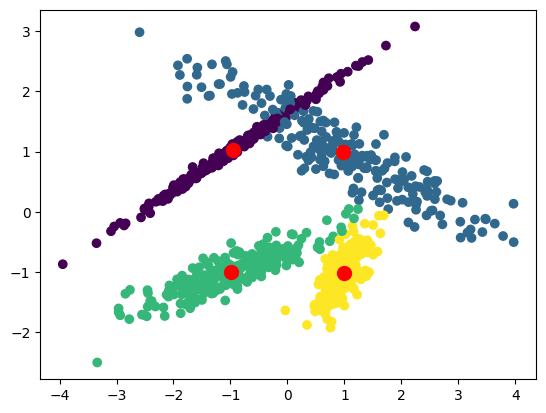

In [137]:
gm = GaussianMixture(n_components=4, n_init=18, covariance_type="full").fit(data1)

pred=gm.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=gm.predict(data1))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("ранд:", rand_score(pred, data1_y))
print("индекс жаккара:", jaccard_score(pred, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, pred))

датасет 2

In [138]:
#param_grid = {
#    "n_init": range(1,30),
#    'covariance_type': ["full",'tied', 'diag', 'spherical'],
#    'n_components': range(2,5)
#}
#
#gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
#gridseach.fit(data2)
#gridseach.best_params_

#>>>> {'covariance_type': 'full', 'n_components': 2, 'n_init': 1}

ранд: 0.9928775656080874
индекс жаккара: 0.002145922746781116 

силуэт: 0.7172478588612272
индекс дэвида- болдуина: 0.39897149666500126


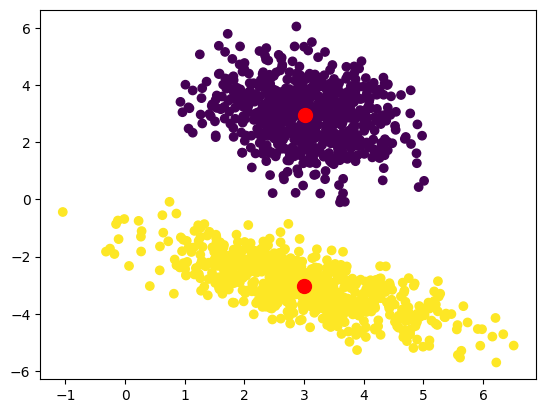

In [139]:
gm = GaussianMixture(n_components=2, n_init=1, covariance_type="full").fit(data2)

pred=gm.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=gm.predict(data2))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("ранд:", rand_score(pred, data2_y))
print("индекс жаккара:", jaccard_score(pred, data2_y),'\n')
print("силуэт:", silhouette_score(data2, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, pred))

датасет 3

In [140]:
#param_grid = {
#    "n_init": range(1,30),
#    'covariance_type': ["full",'tied', 'diag', 'spherical'],
#    'n_components': range(2,5)
#}
#
#gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
#gridseach.fit(data3)
#gridseach.best_params_

#>>>>> {'covariance_type': 'full', 'n_components': 3, 'n_init': 10}

ранд: 0.9979534553206608
индекс жаккара: [0.         0.         0.00115607] 

силуэт: 0.7275325319078786
индекс дэвида- болдуина: 0.3990951819629749


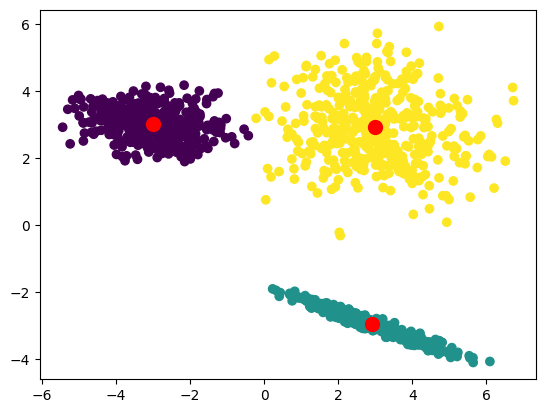

In [141]:
gm = GaussianMixture(n_components=3, n_init=10, covariance_type="full").fit(data3)

pred=gm.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=gm.predict(data3))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("ранд:", rand_score(pred, data3_y))
print("индекс жаккара:", jaccard_score(pred, data3_y, average= None),'\n')
print("силуэт:", silhouette_score(data3, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, pred))

## Иерархическая кластеризация

In [142]:
from sklearn.cluster import AgglomerativeClustering

In [143]:
best_i=0
max_rand=0
for i in range(2,30):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(data1)
    if silhouette_score(data1, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(data1, alg.labels_)
print(best_i)


10


ранд: 0.6289003837810779
индекс жаккара: [0.50214592 0.1991342  0.         0.         0.         0.
 0.         0.         0.         0.        ] 

силуэт: 0.4748942933473266
индекс дэвида- болдуина: 0.6855149467599015


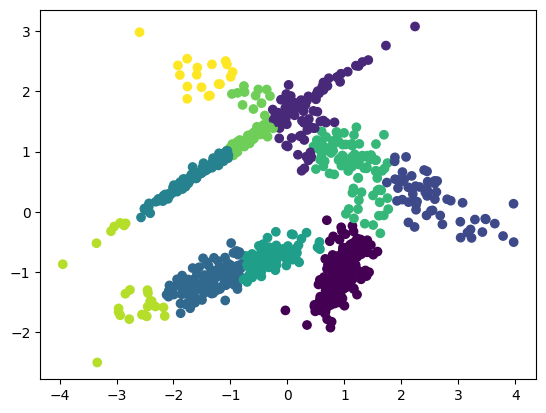

In [144]:

clustering = AgglomerativeClustering(n_clusters=10, linkage="ward").fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, data1_y))
print("индекс жаккара:", jaccard_score(clustering.labels_, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, clustering.labels_))

In [145]:
best_i=0
max_rand=0
for i in range(2,30):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(data2)
    if silhouette_score(data2, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(data2, alg.labels_)
print(best_i)

2


ранд: 0.9928775656080874
индекс жаккара: [0.99287749 0.99288762] 

силуэт: 0.7172478588612272
индекс дэвида- болдуина: 0.39897149666500126


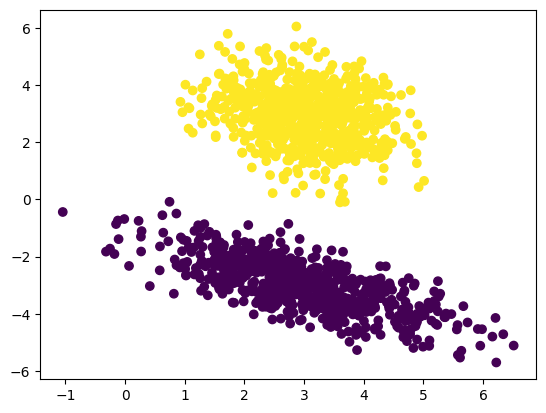

In [146]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, data2_y))
print("индекс жаккара:", jaccard_score(clustering.labels_, data2_y, average= None),'\n')
print("силуэт:", silhouette_score(data2, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, clustering.labels_))

In [147]:
best_i=0
max_rand=0
for i in range(2,30):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(data3)
    if silhouette_score(data3, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(data3, alg.labels_)
print(best_i)

3


ранд: 0.9979534553206608
индекс жаккара: 0.00038476337052712584 

силуэт: 0.7275325319078786
индекс дэвида- болдуина: 0.3990951819629749


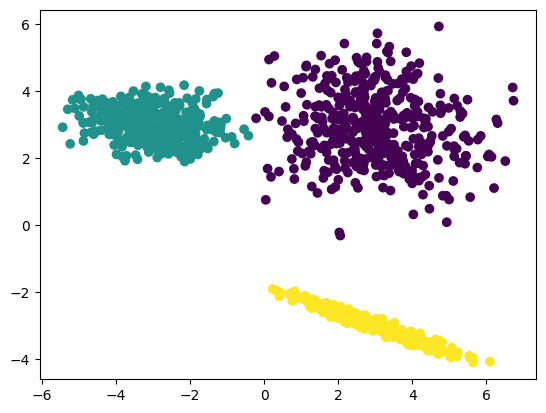

In [148]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, data3_y))
print("индекс жаккара:", jaccard_score(clustering.labels_, data3_y, average= "micro"),'\n')
print("силуэт:", silhouette_score(data3, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, clustering.labels_))

## Карты Кохонена

In [149]:
from sklearn_som.som import SOM

In [150]:
best_i=0
best_j=0
max_rand=-1
best_som=0
for i in range(2,10):
    for j in range (1,10):
        som = SOM(m=i, n=j, dim=2)
        som.fit(data1)
        predictions = som.predict(data1)
        if silhouette_score(data1, predictions) >max_rand:
            best_i=i
            best_j=j
            max_rand=silhouette_score(data1, predictions)
            best_som=som
print(best_i, best_j)

4 1


ранд: 0.7233203996211542
индекс жаккара: 0.0070921985815602835 

силуэт: 0.48501022218473866
индекс дэвида- болдуина: 0.7204250866690085


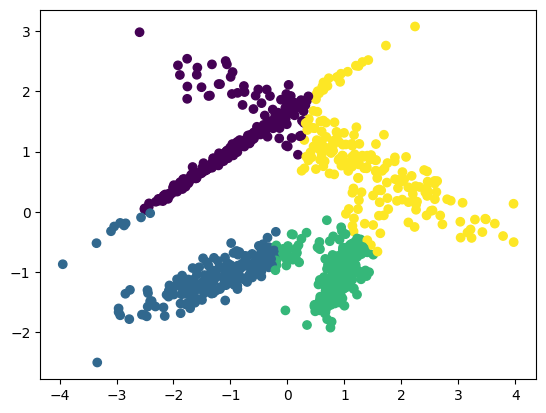

In [151]:
predictions = best_som.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=predictions)

print("ранд:", rand_score(predictions, data1_y))
print("индекс жаккара:", jaccard_score(predictions, data1_y, average= "micro"),'\n')
print("силуэт:", silhouette_score(data1, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, predictions))

In [152]:
best_i=0
best_j=0
max_rand=-1
best_som=0
for i in range(2,10):
    for j in range (1,10):
        som = SOM(m=i, n=j, dim=2)
        som.fit(data2)
        predictions = som.predict(data2)
        if silhouette_score(data2, predictions) >max_rand:
            best_i=i
            best_j=j
            max_rand=silhouette_score(data2, predictions)
            best_som=som
print(best_i, best_j)

2 1


ранд: 0.9886286122740733
индекс жаккара: 0.0028653295128939827 

силуэт: 0.7171120858201538
индекс дэвида- болдуина: 0.39876238488240834


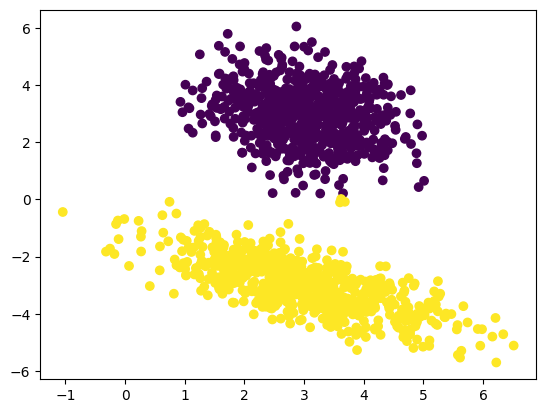

In [153]:
predictions = best_som.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=predictions)

print("ранд:", rand_score(predictions, data2_y))
print("индекс жаккара:", jaccard_score(predictions, data2_y, average= "micro"),'\n')
print("силуэт:", silhouette_score(data2, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, predictions))

In [154]:
best_i=0
best_j=0
max_rand=-1
best_som=0
for i in range(2,10):
    for j in range (1,10):
        som = SOM(m=i, n=j, dim=2)
        som.fit(data3)
        predictions = som.predict(data3)
        if silhouette_score(data3, predictions) >max_rand:
            best_i=i
            best_j=j
            max_rand=silhouette_score(data3, predictions)
            best_som=som
print(best_i, best_j)

3 1


ранд: 0.9769088648072481
индекс жаккара: 0.1872146118721461 

силуэт: 0.7168219571979663
индекс дэвида- болдуина: 0.40460792795534584


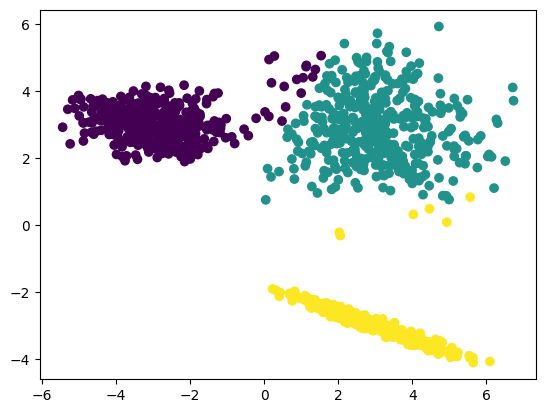

In [155]:
predictions = best_som.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=predictions)

print("ранд:", rand_score(predictions, data3_y))
print("индекс жаккара:", jaccard_score(predictions, data3_y, average= "micro"),'\n')
print("силуэт:", silhouette_score(data3, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, predictions))

## Задание 2

In [156]:
import pandas as pd

from sklearn. preprocessing import OneHotEncoder


In [157]:
data=pd.read_csv("../data/weatherAUS.csv")
data.dropna(inplace=True,ignore_index=True)
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f)
data['Date'] = data['Date'].astype(int)
f = lambda x : 0 if (x == "No") else 1
data['RainToday'] = data['RainToday'].transform(f)
data['RainToday'] = data['RainToday'].astype(int)

data['RainTomorrow'] = data['RainTomorrow'].transform(f)
data['RainTomorrow'] = data['RainTomorrow'].astype(int)
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_encoder = OneHotEncoder(sparse_output=False)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('cat', categorical_encoder, categorical_features)
     ])
# Получите закодированные функции в виде DataFrame.
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(data)
encoded_features.head()
data=data.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1)
df = pd.concat([
    data,
    encoded_features
], axis=1)
df_major_0 = df[df["RainTomorrow"] == 0]
df_minor_1 = df[df["RainTomorrow"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))

dataclass = pd.concat([df_major_0_undersampled, df_minor_1], axis=0)

x_class=dataclass.drop(['RainTomorrow'],axis=1)
y_class=dataclass['RainTomorrow']


In [158]:
#param_grid = {
#    "n_init": range(5,30),
#    'algorithm': ["lloyd",'elkan'],
#   "n_clusters": range(2,10)
#}
#
#gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
#gridseach.fit(x_class)
#gridseach.best_params_

# выаолнялось 36 минут, стоит чего- нибудь поменьше сдеклать
#>>> {'algorithm': 'elkan', 'n_clusters': 9, 'n_init': 7}

In [159]:
kmeans = KMeans(9, n_init=7,algorithm= 'elkan').fit(x_class)

print("ранд:", rand_score(kmeans.labels_, y_class))
print("индекс жаккара:", jaccard_score(kmeans.labels_, y_class, average= None),'\n')
print("силуэт:", silhouette_score(x_class, kmeans.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, kmeans.labels_))

ранд: 0.5350039612174434
индекс жаккара: [0.26247222 0.16665347 0.         0.         0.         0.
 0.         0.         0.        ] 

силуэт: 0.159519000400458
индекс дэвида- болдуина: 1.535407271976203


In [160]:
best_i=0
max_rand=0
clustering=0
for i in range(2,10):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(x_class)
    if silhouette_score(x_class, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(x_class, alg.labels_)
        clustering=alg
print(best_i)

print("ранд:", rand_score(clustering.labels_, y_class))
print("индекс жаккара:", jaccard_score(clustering.labels_, y_class, average= None),'\n')
print("силуэт:", silhouette_score(x_class, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, clustering.labels_))

2
ранд: 0.5976041449303299
индекс жаккара: [0.55970291 0.56750016] 

силуэт: 0.2143117775655583
индекс дэвида- болдуина: 1.5988145335917636


In [161]:
best_i=0
max_rand=0
dbscan1=0
for i in range(2,30):
    dbscan = DBSCAN(eps=30, min_samples=i).fit(x_class)
    if rand_score(dbscan.labels_, y_class)>max_rand:
        best_i=i
        max_rand=rand_score(dbscan.labels_, y_class)
        dbscan1=dbscan
print(i)

29


In [162]:

print(dbscan1.labels_)
print("ранд:", rand_score(dbscan1.labels_, y_class))
print("индекс жаккара:", jaccard_score(dbscan1.labels_, y_class, average= None),'\n')
print("силуэт:", silhouette_score(x_class, dbscan1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, dbscan1.labels_))

[0 0 0 ... 0 0 0]
ранд: 0.499983407708105
индекс жаккара: [0.         0.50044337 0.        ] 

силуэт: 0.5400056988093569
индекс дэвида- болдуина: 1.2065789922554457


## Kmeans

In [166]:
class KMeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
    
    def _euclidean_distance(self, centroid, dots):
        return np.sqrt(np.sum((centroid[:, np.newaxis] - dots) ** 2, axis=2))
    
    def _update_centroids(self, data):
        distances = self._euclidean_distance(data, self.centroids)
          
        clasters = np.argmin(distances, axis=1)
            
        return np.array([np.mean(data[clasters == i], axis=0) for i in range(self.n_clusters)])

    def fit(self, data):
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iterations):
            new_centroids = self._update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids
            
    def predict(self, data):
        distances = self._euclidean_distance(data, self.centroids)
        return np.argmin(distances, axis=1)




ранд: 0.5135733473089497
индекс жаккара: [0.41552511 0.40923077] 

силуэт: 0.40596462823232277
индекс дэвида- болдуина: 1.0746204465679847


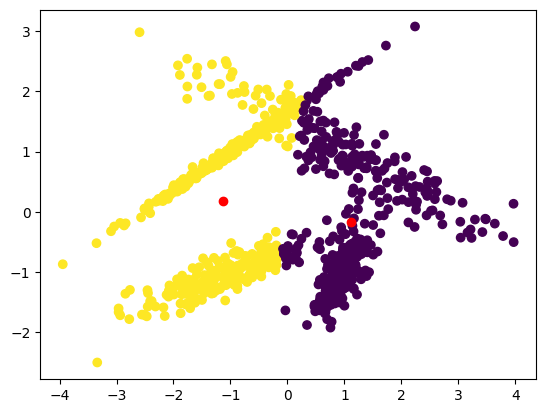

In [167]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
pred = kmeans.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c= pred)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='r')


print("ранд:", rand_score(pred, data1_y))
print("индекс жаккара:", jaccard_score(pred, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, pred))